# Visual Analytics Group Project: 
## Visualizing and Analyzing the Strokes-Prediction Dataset¹

¹Source: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [8]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from matplotlib.widgets import Slider
from ipywidgets import interact


import ipywidgets as widgets

# Loading and Inspecting Data

In [9]:
#use a standard dataset of heterogenous data
strokes = pd.read_csv('data/strokes.csv')
#drop ID column
strokes = strokes.drop('id', axis=1)
#inspect dataframe
strokes.head()



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# 0. Data Cleanup
## Inspect Features and reduce dataset by removing rows with missing entries.  

In [10]:
#inspect features:
for col in strokes.columns:
    print(col, np.unique(strokes[f'{col}']))

gender ['Female' 'Male' 'Other']
age [8.00e-02 1.60e-01 2.40e-01 3.20e-01 4.00e-01 4.80e-01 5.60e-01 6.40e-01
 7.20e-01 8.00e-01 8.80e-01 1.00e+00 1.08e+00 1.16e+00 1.24e+00 1.32e+00
 1.40e+00 1.48e+00 1.56e+00 1.64e+00 1.72e+00 1.80e+00 1.88e+00 2.00e+00
 3.00e+00 4.00e+00 5.00e+00 6.00e+00 7.00e+00 8.00e+00 9.00e+00 1.00e+01
 1.10e+01 1.20e+01 1.30e+01 1.40e+01 1.50e+01 1.60e+01 1.70e+01 1.80e+01
 1.90e+01 2.00e+01 2.10e+01 2.20e+01 2.30e+01 2.40e+01 2.50e+01 2.60e+01
 2.70e+01 2.80e+01 2.90e+01 3.00e+01 3.10e+01 3.20e+01 3.30e+01 3.40e+01
 3.50e+01 3.60e+01 3.70e+01 3.80e+01 3.90e+01 4.00e+01 4.10e+01 4.20e+01
 4.30e+01 4.40e+01 4.50e+01 4.60e+01 4.70e+01 4.80e+01 4.90e+01 5.00e+01
 5.10e+01 5.20e+01 5.30e+01 5.40e+01 5.50e+01 5.60e+01 5.70e+01 5.80e+01
 5.90e+01 6.00e+01 6.10e+01 6.20e+01 6.30e+01 6.40e+01 6.50e+01 6.60e+01
 6.70e+01 6.80e+01 6.90e+01 7.00e+01 7.10e+01 7.20e+01 7.30e+01 7.40e+01
 7.50e+01 7.60e+01 7.70e+01 7.80e+01 7.90e+01 8.00e+01 8.10e+01 8.20e+01]
hypertension 

In [11]:
#drop datapoints with bmi == NaN
print(f'Removing NaN-entries in the "bmi" column: \nDatapoints before reduction:',len(strokes))
strokes.dropna(subset = ["bmi"], inplace=True)
print(r'And after:',len(strokes))

#drop datapoints with smoking_status == Unknown to reduce dataset-size and have better insight into correlation between smoking and other features:
#print(f'Removing entries with unknown smoking status: \nDatapoints before reduction:',len(strokes))
#strokes = strokes[~strokes['smoking_status'].isin(['Unknown'])]
#print(r'And after:',len(strokes))

#drop datapoints with gender == other bcse only one datapoint:
print(f'Removing entries with "other" gender (only 1 datatpoint): \nDatapoints before reduction:',len(strokes))
strokes = strokes[~strokes['gender'].isin(['Other'])]
print(r'And after:',len(strokes))


Removing NaN-entries in the "bmi" column: 
Datapoints before reduction: 5110
And after: 4909
Removing entries with "other" gender (only 1 datatpoint): 
Datapoints before reduction: 4909
And after: 4908


In [12]:
# split into two subsests, stroke/no stroke:
had_stroke = strokes[~strokes['stroke'].isin([0])]
no_stroke = strokes[~strokes['stroke'].isin([1])]
print(len(had_stroke),f'patients suffered a stroke,',len(no_stroke),'did not.')

209 patients suffered a stroke, 4699 did not.


# 1. Analyze Dataset on the level of individual attributes, using Descriptive Statistics.

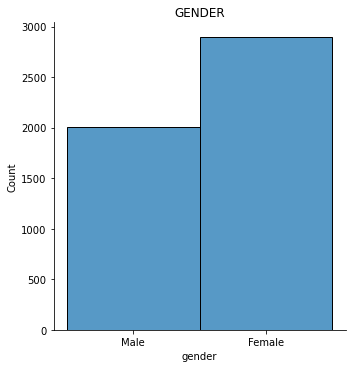

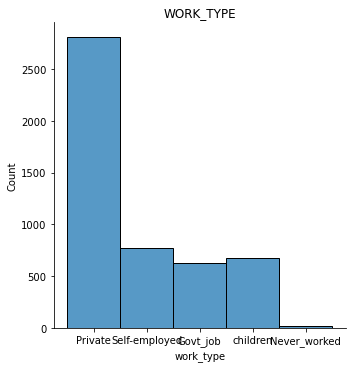

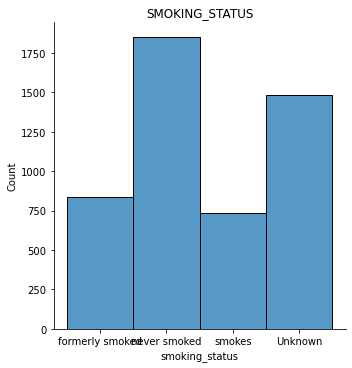

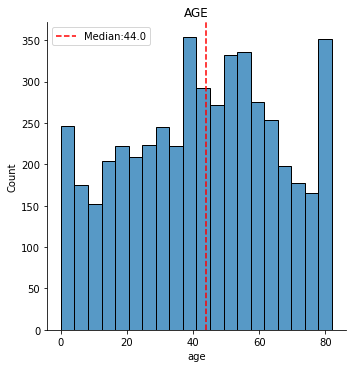

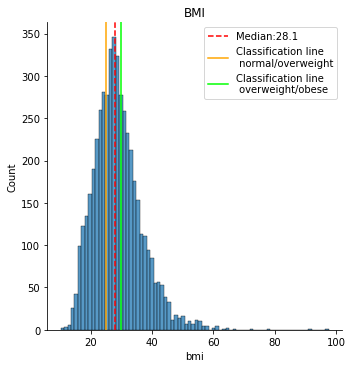

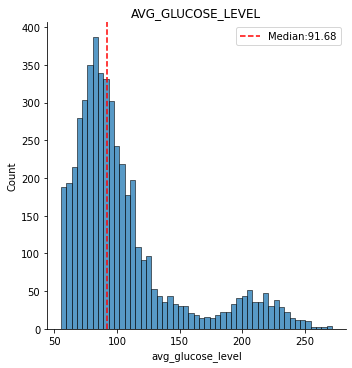

In [13]:
feature_subset = ['gender','work_type','smoking_status','age','bmi','avg_glucose_level']
feature_subset_q = ['age','bmi','avg_glucose_level']
for col in feature_subset:
    base = sns.displot(strokes, x=f"{col}")
    plt.title(col.upper())
    if col in feature_subset_q:
        plt.axvline(x=strokes[col].median(),linestyle='--',
            color='red', label=f'Median:{strokes[col].median()}')
        if col == 'bmi':
            plt.axvline(x=25,
                color='orange',label='Classification line\n normal/overweight')
            plt.axvline(x=30,
                color='lime',label='Classification line\n overweight/obese')
        plt.legend(loc=0)
    plt.show()
    

In [18]:
# median of age:
median_age = np.median(strokes['age'])
print(f'Further statistics:\n\nThe median age is',median_age,'years.\n')

median_bmi= np.median(strokes['bmi'])
mean_bmi= np.mean(strokes['bmi'])
bmis = np.asarray(strokes['bmi'])
overweight = (bmis >=25).sum()/(bmis>0).sum()*100
obese = (bmis >=30).sum()/(bmis>0).sum()*100

print(f'The median BMI is',median_bmi,'the mean BMI is',mean_bmi.round(2),',',overweight.round(2),'% of patients\' BMI\'s are above 25 (=overweight),',obese.round(2),'% are above 30 (=obese).\n')

median_gluc = np.median(strokes['avg_glucose_level'])
glucs = np.asarray(strokes['avg_glucose_level'])
diabetic = (glucs >= 200).sum() / (glucs>0).sum()*100 

print(f'The median Average Glucose Level is',median_gluc,',\nwhereas',diabetic.round(2),'% of patients would be considered diabetic.')

mean_age = np.mean(strokes['age'])

#print(mean_age)


Further statistics:

The median age is 44.0 years.

The median BMI is 28.1 the mean BMI is 28.89 , 67.83 % of patients' BMI's are above 25 (=overweight), 39.12 % are above 30 (=obese).

The median Average Glucose Level is 91.68 ,
whereas 7.97 % of patients would be considered diabetic.


## Insights:

* Gender is not equally distributed in the dataset (2:3 ratio - m:f)
* Most patients are employed in the private sector.
* The ratio of non-smokers vs. smokers (former + current) vs. unknown smoking status is roughly 1/3 each.
* The median age is 44 years, as opposed to the median age of Americans which is 38.4 years³. 
* According to the BMI standard², 67.83% of the patients are classified overweight(pre-obesity), and 39.12% obese, which is even for US-standards rather high (avg. BMI of 28.5³ vs. avg. of Dataset = 28.89).
* The median Average Glucose Level is 91.68 although it appears to be bimodal with a mode around 80 mg/dL and one around 220 mg/dL. Whereas less than 140 mg/dL is considered healthy and higher than 200 mg/dL is considered diabetic, from which follows that 7.97 % of the patienst are considered diabetic.⁴ 
* All in all the data does not seem to be representing a population as a whole, but rather a "hospital-patients"-population. 

¹https://www.statista.com/statistics/241494/median-age-of-the-us-population/  
²https://www.euro.who.int/en/health-topics/disease-prevention/nutrition/a-healthy-lifestyle/body-mass-index-bmi  
³https://en.wikipedia.org/wiki/List_of_countries_by_body_mass_index  
⁴https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451  

# 2. Analyze dataset by looking at correlations between attributes

                        age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.274395       0.257104           0.236000   
hypertension       0.274395      1.000000       0.115978           0.180614   
heart_disease      0.257104      0.115978       1.000000           0.154577   
avg_glucose_level  0.236000      0.180614       0.154577           1.000000   
bmi                0.333314      0.167770       0.041322           0.175672   
stroke             0.232313      0.142503       0.137929           0.138984   

                        bmi    stroke  
age                0.333314  0.232313  
hypertension       0.167770  0.142503  
heart_disease      0.041322  0.137929  
avg_glucose_level  0.175672  0.138984  
bmi                1.000000  0.042341  
stroke             0.042341  1.000000  


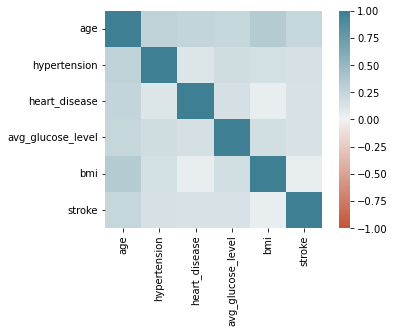

In [17]:
#correlation of all attributes
corr= strokes.corr()
ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(20,220,n =200), square = True)
print(corr)

As we can see from this list and the heatmap: bmi and heart_disease, and bmi and stroke do not have a high correlation it is near to zero so there is not really a linear relationship
The highest correlation have: age and hypertension, heart_disease and age and stroke and age.


In [18]:
#Pearson correlation coefficient for the lowest correlation
from scipy import stats
stats.pearsonr(strokes['bmi'], strokes['heart_disease'])


(0.04132209529578941, 0.003786681612050488)

the first number shows the pearson correlation coefficient and is similar to the correlation coefficient --> near 0 so no correaltion between those attributes

In [19]:
#Pearson correlation coefficient for the highest correlation
stats.pearsonr(strokes['age'], strokes['hypertension'])

(0.2743948710982812, 1.681861582881368e-85)

the first number shows the pearson correlation coefficient and is similar to the correlation coefficient --> greater 0 so a positive correlation between those attributes


In [21]:
# https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Selection-widgets
base_chart_1 = alt.Chart(strokes).mark_point().encode(
    x='age',
    y='bmi',
    
    
).configure_mark(
    opacity=0.5,
    #color='Red'
).properties(
    title='Correlations bmi and other attributes'
)
@widgets.interact(x = ['age','heart_disease', 'hypertension', 'stroke'])

def show_plot_1(x):
    # You have to return the chart to make it visible.
    return base_chart_1.encode(
    x=x,
)#.interactive()



interactive(children=(Dropdown(description='x', options=('age', 'heart_disease', 'hypertension', 'stroke'), va…

In [22]:
# https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Selection-widgets
base_chart_2 = alt.Chart(strokes).mark_point().encode(
    x='bmi',
    y='age',
    
    
).configure_mark(
    opacity=0.5,
    #color='Red'
).properties(
    title='Correlation age and other attributes'
)
@widgets.interact(x = ['bmi', 'heart_disease','stroke', 'hypertension'])

def show_plot_1(x):
    # You have to return the chart to make it visible.
    return base_chart_2.encode(
    x=x,
)#.interactive()


interactive(children=(Dropdown(description='x', options=('bmi', 'heart_disease', 'stroke', 'hypertension'), va…

## Insights:

# 3. Interactive Clustering
## 3.1 Apply different clustering algorithms

### Bin mir noch nicht sicher, ob wir so viele Zeilen wie in Punkt 1 entfernen sollen oder nicht . Hab jetzt mal noch mit mehr Zeilen modelliert
### Und kann sein, dass das Standardisieren der Daten so noch nicht passt!

In [14]:
#use a standard dataset of heterogenous data
strokes = pd.read_csv('data/strokes.csv')
#drop ID column
strokes = strokes.drop('id', axis=1)

# create a copy of the dataset
stroke = strokes.copy()
# fill empty cells in bmi with mean
stroke['bmi'] = stroke['bmi'].fillna(stroke['bmi'].mean())
# remove rows with 'Other' in attribute gender
stroke = stroke[~stroke['gender'].isin(['Other'])]
# categorize the variable age into 3 groups
stroke['age_cat'] = pd.cut((stroke['age']), 3, labels=['young ', 'middle ', 'old '])

### Make variables numerical

In [15]:
# male is 1, female 0
stroke['gender'] = pd.get_dummies(stroke['gender'], drop_first=True)
# urban is 1, rural 0
stroke['Residence_type'] = pd.get_dummies(stroke['Residence_type'], drop_first=True)
# yes is 1, no 0
stroke['ever_married'] = pd.get_dummies(stroke['ever_married'], drop_first=True)

In [16]:
#from numpy import nan as NA
# removing people under 18 years old
#def remove_age(age):
#    if age < 18:
#        return NA
#    else:
#        return age
#stroke['age'] = stroke['age'].apply(remove_age)
#stroke['age'].dropna(inplace=True)
#stroke.dropna(inplace=True)

In [17]:
label = LabelEncoder()
# make categorical data numerical
stroke['work_type'] = label.fit_transform(stroke['work_type'])
stroke['smoking_status'] = label.fit_transform(stroke['smoking_status'])
stroke['age_cat'] = label.fit_transform(stroke['age_cat'])

# drop variable age
stroke.drop('age', inplace=True, axis=1)

In [18]:
# standardize variables
stn = StandardScaler()
stroke['avg_glucose_level'] = stn.fit_transform(stroke['avg_glucose_level'].values.reshape(-1, 1))
stroke['bmi'] = stn.fit_transform(stroke['bmi'].values.reshape(-1, 1))

### Before creating the interactive plot, I tried some things on dimensionality reduction and clustering as well as finding the optimal amount of clusters

In [19]:
# fit data using PCA
pca = PCA()
pca.fit(stroke)
# print how much variance gets explained by each of the 11 components
pca.explained_variance_ratio_

array([0.34705779, 0.17435015, 0.14425856, 0.12189712, 0.07804527,
       0.04250853, 0.0407858 , 0.02174359, 0.01377821, 0.00853142,
       0.00704357])

In [20]:
# in the graph you can see the accumulated sum of the explained variance
# rule ot thumb is to have around 80% which would lead to choosing 5 components here
# plt.plot(range(1,12), pca2.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

In [21]:
# perform PCA with 2 components
pca = PCA(n_components = 2)
pca.fit(stroke)
# calculate scores
scores_pca = pca.transform(stroke)

In [22]:
# within cluster sum of squares
wcss = []
# to find out how many clusters we should create, we will try out a good amount and look at the results
# here up to 15 clusters
for i in range(1,16):
        kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 30)
        kmeans_pca.fit(scores_pca)
        wcss.append(kmeans_pca.inertia_)

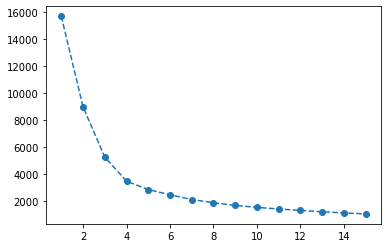

In [23]:
plt.plot(range(1,16), wcss, marker = 'o', linestyle = '--')

In [24]:
# using the Elbow-method, there is a bend at 3 clusters in the curve which we decide to try and make 3 clusters for now
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 30)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=30)

In [25]:
# combine dataframe (add scores to it)
stroke_km = pd.concat([stroke.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
# metadata
stroke_km.columns.values[-2: ] = ['Component1_pca', 'Component2_pca']
# add cluster to each row
stroke_km['Cluster_pca_labels'] = kmeans_pca.labels_

In [26]:
# "labels" for cluster
stroke_km['Cluster_pca'] = stroke_km['Cluster_pca_labels'].map({0:'first',
                                                     1:'second',
                                                     2:'third'})

<AxesSubplot:xlabel='Component2_pca', ylabel='Component1_pca'>

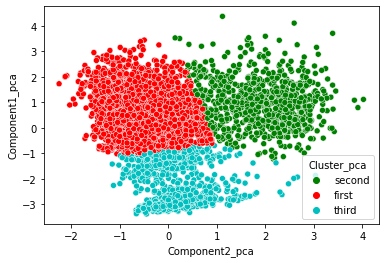

In [27]:
# plot the data
sns.scatterplot(stroke_km['Component2_pca'], stroke_km['Component1_pca'], hue = stroke_km['Cluster_pca'], palette = ['g', 'r', 'c'])

### t-SNE

In [28]:
tsne = TSNE(n_components = 2)
tsne_result = tsne.fit_transform(stroke)

In [29]:
# calculate scores
scores_tsne = tsne.fit_transform(stroke)
# within cluster sum of squares
wcss_tsne = []
# to find out how many clusters we should create, we will try out a good amount and look at the results
# here up to 15 clusters
for i in range(1,16):
        kmeans_tsne = KMeans(n_clusters = i, init = 'k-means++', random_state = 30)
        kmeans_tsne.fit(scores_tsne)
        wcss_tsne.append(kmeans_tsne.inertia_)

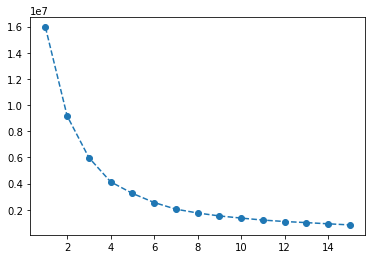

In [30]:
plt.plot(range(1,16), wcss_tsne, marker = 'o', linestyle = '--')

In [31]:
# using the Elbow-method, there is a bend at 3 clusters in the curve which we decide to try and make 3 clusters for now
kmeans_tsne = KMeans(n_clusters = 3, init = 'k-means++', random_state = 30)
kmeans_tsne.fit(scores_tsne)

KMeans(n_clusters=3, random_state=30)

In [32]:
# combine dataframe (add scores to it)
stroke_km2 = pd.concat([stroke.reset_index(drop = True), pd.DataFrame(scores_tsne)], axis = 1)
# metadata
stroke_km2.columns.values[-2: ] = ['Component1_tsne', 'Component2_tsne']
# add cluster to each row
stroke_km2['Cluster_tsne_labels'] = kmeans_tsne.labels_

In [33]:
# "labels" for cluster
stroke_km2['Cluster_tsne'] = stroke_km2['Cluster_tsne_labels'].map({0:'first',
                                                     1:'second',
                                                     2:'third'})

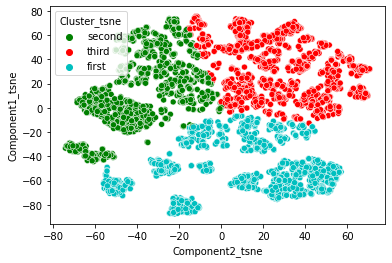

In [34]:
# plot the data
fig = sns.scatterplot(stroke_km2['Component2_tsne'], stroke_km2['Component1_tsne'], hue = stroke_km2['Cluster_tsne'], palette = ['g', 'r', 'c'])

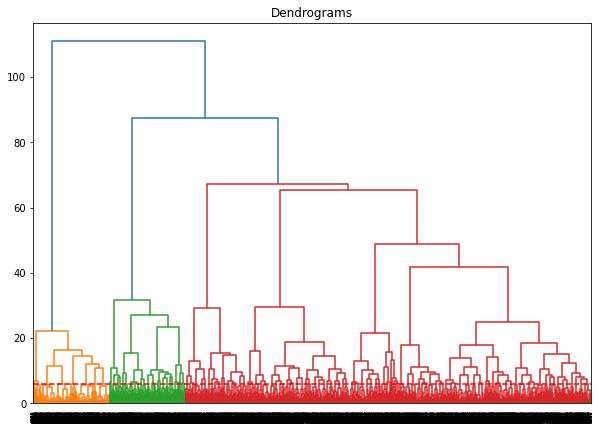

In [35]:
# plot a dendrogram for hierarchical clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(stroke, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

## 3.2 Inspecting Clusters

### Interactive plot with options to choose for the dimensionality reduction technique as well as the clustering method and the number of clusters

In [36]:
# set up plot

def update(cluster = 3,dimred = 't-SNE', cl_method = 'k-Means'):
    
    if(dimred == 'PCA'):
        scores = scores_pca
    else:
        scores = scores_tsne
    if(cl_method == 'Agglomerative'):
        cluster_method = AgglomerativeClustering(n_clusters=cluster, affinity='euclidean', linkage='ward')  
        cluster_method.fit_predict(scores)
    else:
        cluster_method = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 30)
        cluster_method.fit(scores) 
   
   
    # combine dataframe (add scores to it)
    stroke_new = pd.concat([stroke.reset_index(drop = True), pd.DataFrame(scores)], axis = 1)
    # metadata
    stroke_new.columns.values[-2: ] = ['Component1', 'Component2']
    # add cluster to each row
    stroke_new['Cluster_labels'] = cluster_method.labels_
    # "labels" for cluster
    stroke_new['Cluster'] = stroke_new['Cluster_labels'].map({0:'Cluster 1',
                                                         1:'Cluster 2',
                                                         2:'Cluster 3',
                                                         3:'Cluster 4',
                                                         4:'Cluster 5',
                                                         5:'Cluster 6',
                                                         6:'Cluster 7',
                                                         7:'Cluster 8',
                                                         8:'Cluster 9',
                                                         9:'Cluster 10',
                                                         10:'Cluster 11',
                                                         11:'Cluster 12',
                                                         12:'Cluster 13',
                                                         13:'Cluster 14',
                                                         14:'Cluster 15'})
    sns.scatterplot(stroke_new['Component2'], stroke_new['Component1'], hue = stroke_new['Cluster'])
    # move legend next to plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    plt.show()
    
    
interact(update, cluster = (1,15), 
         dimred=widgets.RadioButtons(
            options=['t-SNE','PCA'],
            description='Dimensionality Reduction'), 
         cl_method=widgets.RadioButtons(
            options=['k-Means','Agglomerative'],
            description='Cluster Method'))

interactive(children=(IntSlider(value=3, description='cluster', max=15, min=1), RadioButtons(description='Dime…

<function __main__.update(cluster=3, dimred='t-SNE', cl_method='k-Means')>

## Insights: